In [62]:
import numpy as np
import imageio
from skimage.color import rgb2gray
#from scipy import misc, ndimage #read/write image
import matplotlib.pyplot as plt

<class 'imageio.core.util.Array'>
le  shape de image est  (450, 450, 3)
le dtype est : uint8


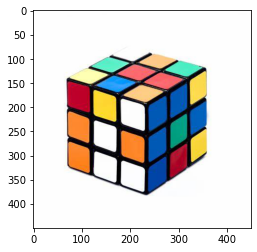

In [63]:
f=imageio.imread("oip.jfif")
print(type(f))
print("le  shape de image est ",f.shape)
print('le dtype est :',f.dtype)
plt.subplot(111)
plt.imshow(f,cmap=plt.cm.gray)

In [64]:
#rgb->gray
gray_image=rgb2gray(f)
print(gray_image.shape)

(450, 450)


In [65]:
#fftshift c'est pour cetre la frequence 0 au centre de l'image 
fourrier_image_tr = np.fft.fftshift(np.fft.fft2(gray_image))
print("la taille de spectre :",fourrier_image_tr.shape,"le dtype est :",fourrier_image_tr.dtype,sep="\t")

la taille de spectre :	(450, 450)	le dtype est :	complex128


In [66]:
#le spectre
spectre=abs(fourrier_image_tr)
print(type(spectre))
print(spectre.dtype)
#la phase
phase=np.angle(fourrier_image_tr)
print(type(phase))
print(phase.dtype)

<class 'numpy.ndarray'>
float64
<class 'numpy.ndarray'>
float64


In [67]:
def affiche_spectre_phase(spectre,phase):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(spectre,cmap=plt.cm.gray)
    
    #phase
    plt.subplot(1,2,2)
    mmax=np.max(phase)
    mmin=np.min(phase)
    if mmax==mmin:
        b=0
    else:
        b=255*(phase-mmin)/(mmax-mmin)
    plt.imshow(phase,cmap=plt.cm.gray)

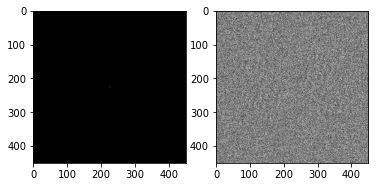

In [68]:
affiche_spectre_phase(spectre,phase)

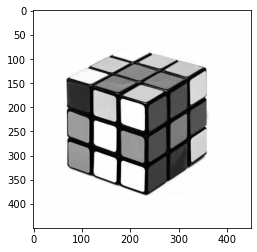

In [69]:
image=np.real(np.fft.ifft2(np.fft.fftshift(fourrier_image_tr)))
#image
plt.figure()
plt.imshow(image,cmap=plt.cm.gray)

##### reconstruction de l'image sans phase 

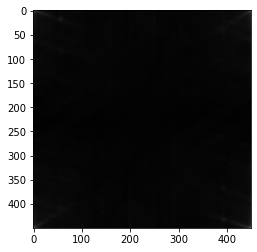

In [70]:
image=np.real(np.fft.ifft2(np.fft.fftshift(spectre)))
#image
plt.figure()
plt.imshow(image,cmap=plt.cm.gray)

##### reconstruction de l'image sans spectre

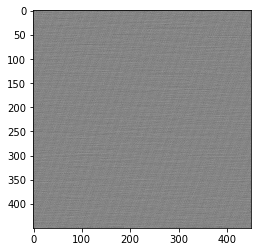

In [71]:
image=np.real(np.fft.ifft2(np.fft.fftshift(phase)))
#image
plt.figure()
plt.imshow(image,cmap=plt.cm.gray)

##### appliquer filtre pass-bas  butterworth

In [72]:
import math
l,c=fourrier_image_tr.shape
print(l)
H=np.zeros((l,c),dtype=np.float32)
print(H.shape)

freq_corpure=10
n=1
for x in range(c):
    for y in range(l):
        D=np.sqrt((l/2 - x)**2+(c/2 -y)**2)
        H[y,x]=1/(1+(D/freq_corpure)**(2*n))

450
(450, 450)


In [73]:
F=fourrier_image_tr*H # l'image filtrée en frequentiel

In [74]:
print("the shape of F est ",F.shape)
print("the shape of tf_image est ",fourrier_image_tr.shape)
print("the shape of the mask est ",H.shape)

the shape of F est  (450, 450)
the shape of tf_image est  (450, 450)
the shape of the mask est  (450, 450)


##### afficher l'inverse de la transforme de fourrier de l'image filtrée 

In [83]:
img_filtre=np.real(np.fft.ifft2(np.fft.ifftshift(F)))
print(type(img_filtre))

<class 'numpy.ndarray'>


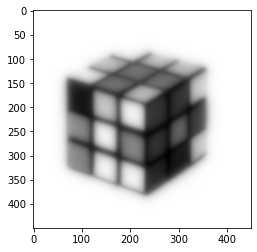

In [84]:
plt.figure()
plt.imshow(img_filtre,cmap=plt.cm.gray)

#####  filtre de Butterworth pass-haut

In [85]:
import math
l,c=fourrier_image_tr.shape
print(l)
H2=np.zeros((l,c),dtype=np.float32)
print(H.shape)
freq_corpure=10
n=1
for x in range(c):
    for y in range(l):
        D=np.sqrt((l/2 - x)**2+(c/2 -y)**2)
        H2[y,x]=1/(1+(freq_corpure/D)**(2*n))

450
(450, 450)


C:\Users\safae\AppData\Local\Temp\ipykernel_19820\3787162470.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  H2[y,x]=1/(1+(freq_corpure/D)**(2*n))


In [86]:
F2=fourrier_image_tr*H2 # l'image filtrée en frequentiel

In [87]:
img_filtre2=np.real(np.fft.ifft2(np.fft.ifftshift(F2)))
print(type(img_filtre2))

<class 'numpy.ndarray'>


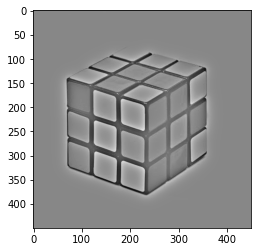

In [88]:
plt.figure()
plt.imshow(img_filtre2,cmap=plt.cm.gray)